In [6]:
#!pip install replica!te
!pip install Pillow
!pip install requests
!export REPLICATE_API_TOKEN=<token>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.6 MB/s eta 0:00:00


In [20]:
import replicate
from PIL import Image
import io
import time
import requests
from IPython.display import display

async def run_replicate(**kwargs):
    start_t = time.time()
    input = {
        "image": kwargs["image"],
        "prompt": kwargs["prompt"],
    }

    output = replicate.run(
        "wolverinn/realistic-background:ce02013b285241316db1554f28b583ef5aaaf4ac4f118dc08c460e634b2e3e6b",
        input=input
    )
    end_t = time.time()
    print(f"Time taken: {end_t - start_t}")
    return output


# Load image from our cloudinary account
url = "https://res.cloudinary.com/dky11qong/image/upload/c_pad,b_auto:predominant,fl_preserve_transparency/v1711672225/tellit/ncgq9l8sanfy1jxx2fwl.jpg?_s=public-apps"

org = Image.open(io.BytesIO(requests.get(url).content))

# Run Replicate
result = await run_replicate(
    image=url,
    prompt="top down view of a big pancake dish, 8k uhd, dslr, high quality, Fujifilm XT3")
print(result)

Time taken: 99.19330406188965
{'image': 'https://replicate.delivery/pbxt/dGw3836NVUp5PpWJkUWXxetwdy0UVeispEr6DA1mE9eSEfTKB/a53ad9e6-ed86-11ee-953b-5ebf539512c3.png', 'payload': {'info': '{"prompt": "top down view of a big pancake dish, 8k uhd, dslr, high quality, Fujifilm XT3", "all_prompts": ["top down view of a big pancake dish, 8k uhd, dslr, high quality, Fujifilm XT3"], "negative_prompt": "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation", "all_negative_prompts": ["(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs,

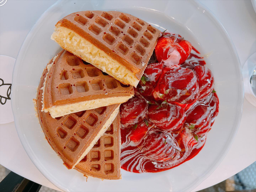

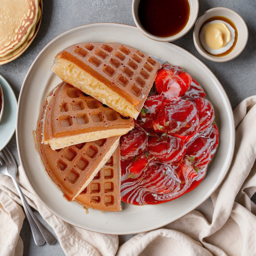

In [21]:
# Display the original image and the result
org.thumbnail((256, 256))
display(org)

resp = requests.get(result["image"])
img = Image.open(io.BytesIO(resp.content))
img.thumbnail((256, 256))
display(img)